In [0]:
pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-0g368mb4
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-0g368mb4
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=0401f5071c82e56005e4d140aa6181de72554a8ebb5d9b0c01a432da3afa0a29
  Stored in directory: /tmp/pip-ephem-wheel-cache-5medkfrt/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [0]:
pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: h5py, numpy, six, scipy, keras, pyyaml, pillow
Required-by: 


In [0]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 
  Created wheel for mtcnn: filename=mtcnn-0.0.9-cp36-none-any.whl size=2257692 sha256=a6b9f75f3a77cdde5e949974b483c2dae7103c682bf0edeab4a8cf35b0660835
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


In [0]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.0.9


In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/6e/Sharon_Stone_Cannes_2013_2.jpg

--2019-08-21 07:27:11--  https://upload.wikimedia.org/wikipedia/commons/6/6e/Sharon_Stone_Cannes_2013_2.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82711 (81K) [image/jpeg]
Saving to: ‘Sharon_Stone_Cannes_2013_2.jpg’

Sharon_Stone_Cannes 100%[===================>]  80.77K  --.-KB/s    in 0.1s    

2019-08-21 07:27:11 (738 KB/s) - ‘Sharon_Stone_Cannes_2013_2.jpg’ saved [82711/82711]



W0821 07:27:22.145853 140586219177856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0821 07:27:22.181038 140586219177856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0821 07:27:23.421305 140586219177856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0821 07:27:23.423357 140586219177856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 07:27:23.437407 140586219177856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/layer_factory.py:7

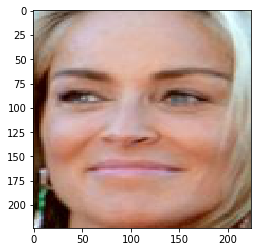

In [0]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
pixels = extract_face('Sharon_Stone_Cannes_2013_2.jpg')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()

In [0]:
# Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
pixels = extract_face('Sharon_Stone_Cannes_2013_2.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

W0821 07:28:56.793421 140586219177856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0821 07:29:02.432503 140586219177856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



1351680/1346516 [==============================] - 1s 1us/step
b' Sharon_Stone': 99.642%
b' Noelle_Reno': 0.085%
b' Elisabeth_R\xc3\xb6hm': 0.033%
b' Anita_Lipnicka': 0.026%
b' Tina_Maze': 0.019%


In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/8/8d/Channing_Tatum_by_Gage_Skidmore_3.jpg

--2019-08-21 07:30:13--  https://upload.wikimedia.org/wikipedia/commons/8/8d/Channing_Tatum_by_Gage_Skidmore_3.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2835168 (2.7M) [image/jpeg]
Saving to: ‘Channing_Tatum_by_Gage_Skidmore_3.jpg’

Channing_Tatum_by_G 100%[===================>]   2.70M  7.08MB/s    in 0.4s    

2019-08-21 07:30:13 (7.08 MB/s) - ‘Channing_Tatum_by_Gage_Skidmore_3.jpg’ saved [2835168/2835168]



In [0]:
# Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
pixels = extract_face('Channing_Tatum_by_Gage_Skidmore_3.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

b' Channing_Tatum': 90.705%
b' Les_Miles': 0.274%
b' Eoghan_Quigg': 0.193%
b' Nico_Rosberg': 0.136%
b' Venke_Knutson': 0.127%


In [0]:
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone2.jpg

--2019-08-21 07:34:44--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone2.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 151.139.105.8
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|151.139.105.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38658 (38K) [image/jpeg]
Saving to: ‘sharon_stone2.jpg’

sharon_stone2.jpg   100%[===================>]  37.75K  --.-KB/s    in 0.03s   

2019-08-21 07:34:45 (1.19 MB/s) - ‘sharon_stone2.jpg’ saved [38658/38658]



In [0]:
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone3.jpg

--2019-08-21 07:35:12--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone3.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 151.139.105.8
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|151.139.105.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4352336 (4.2M) [image/jpeg]
Saving to: ‘sharon_stone3.jpg’

sharon_stone3.jpg   100%[===================>]   4.15M  --.-KB/s    in 0.1s    

2019-08-21 07:35:12 (41.6 MB/s) - ‘sharon_stone3.jpg’ saved [4352336/4352336]



In [0]:
# face verification with the VGGFace2 model
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
	# extract faces
	faces = [extract_face(f) for f in filenames]
	# convert into an array of samples
	samples = asarray(faces, 'float32')
	# prepare the face for the model, e.g. center pixels
	samples = preprocess_input(samples, version=2)
	# create a vggface model
	model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
	# perform prediction
	yhat = model.predict(samples)
	return yhat

# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
	# calculate distance between embeddings
	score = cosine(known_embedding, candidate_embedding)
	if score <= thresh:
		print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

# define filenames
filenames = ['Sharon_Stone_Cannes_2013_2.jpg', 'sharon_stone2.jpg',
	'sharon_stone3.jpg', 'Channing_Tatum_by_Gage_Skidmore_3.jpg']
# get embeddings file filenames
embeddings = get_embeddings(filenames)
# define sharon stone
sharon_id = embeddings[0]
# verify known photos of sharon
print('Positive Tests')
is_match(embeddings[0], embeddings[1])
is_match(embeddings[0], embeddings[2])
# verify known photos of other people
print('Negative Tests')
is_match(embeddings[0], embeddings[3])

94699520/94694792 [==============================] - 7s 0us/step
Positive Tests
>face is a Match (0.418 <= 0.500)
>face is a Match (0.295 <= 0.500)
Negative Tests
>face is NOT a Match (0.710 > 0.500)
